In [10]:
import numpy as np #math functions as pi,e,random,arrays, etc 
import matplotlib.pyplot as plt #default plotting library
import pandas as pd #for printing nice tables (pd.DataFrame)
import seaborn as sbn #extra version of plt
plt.rcParams['pdf.fonttype'] = 42 #to use Type 42 (a.k.a. TrueType) fonts for PDF files
plt.rcParams['ps.fonttype']  = 42 #to use Type 42 (a.k.a. TrueType) fonts for PostScript files
plt.rcParams['svg.fonttype'] = 'none' #for neither embedding the font nor rendering the text as path
plt.rcParams.update({'font.size': 7}) #defined font size
plt.rcParams['figure.dpi']   = 200 #increases the quality of images
#import mpltern #to plot ternary diagrams
#from matplotlib_scalebar.scalebar import ScaleBar #to add a scale bar to the maps
from functionsmapping import to_anhydrous, to_mol, to_cat, norm_calc, add_fe2o3 #importing external functions

print('This script allows plotting EPMA quantitative maps and do calculations with the data within')


This script allows plotting EPMA quantitative maps and do calculations with the data within


In [11]:
#Reading excel file with major and trace elements in glasses
#data        = pd.read_excel (r'Data/09028A_M1.xlsx',skiprows=[0])
data        = pd.read_excel (r'/workspaces/epMapy/Data/09028A_M1.xlsx',)
#Creating two arrays (composition and coordinates) using data from excel file using the name of the columns
df_majors   = pd.DataFrame(data, columns = ['SiO2 WT%','TiO2 WT%','Al2O3 WT%','FeO WT%','MnO WT%','MgO WT%',
                                         'CaO WT%','Na2O WT%','K2O WT%','P2O5 WT%','Total'])
df_coord    = pd.DataFrame(data, columns = ['X','Y','NX','NY'])
#transform array to a new one which can bed use to perform calculations
data_majors = df_majors.to_numpy()
data_coord  = df_coord.to_numpy()

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
c           = int(max(data_coord[:,2]))-1 #max num pixel on x
d           = int(max(data_coord[:,3]))-1 #max num pixel on y
#setting up empty molar fractions arrays
NK_A        = np.zeros((d,c)) #NK/A
NKC_A       = np.zeros((d,c)) #NKC/A
Mg_MgFe2    = np.zeros((d,c)) #XMg(Fe2+)
K_Na        = np.zeros((d,c)) #K/Na
#setting up empty cation fractions arrays
Mf          = np.zeros((d,c)) #M factor
#setting up empty anhydrous-based oxides wt.% arrays
SiO2        = np.zeros((d,c))
TiO2        = np.zeros((d,c))
Al2O3       = np.zeros((d,c))
FeO         = np.zeros((d,c))
MnO         = np.zeros((d,c))
MgO         = np.zeros((d,c))
CaO         = np.zeros((d,c))
Na2O        = np.zeros((d,c))
K2O         = np.zeros((d,c))
P2O5        = np.zeros((d,c))
#setting up empty Normative Differentiation Index array
DI          = np.zeros((d,c))
#setting up empty normative minerals wt.% arrays
Q           = np.zeros((d,c)) #quartz
Fsp         = np.zeros((d,c)) #albite + orthoclase
Ne          = np.zeros((d,c)) #nepheline
#setting up empty coordinate arrays (mesh-like)
Nx          = np.zeros((d,c)) #coordinates of pixels (columns)
Ny          = np.zeros((d,c)) #coordinates of pixels (rows)

In [ ]:
data_anhf   = to_anhydrous(data_majors) #calculates anhydrous-base oxide compositions wt.%
data_molf   = to_mol(data_anhf)         #calculates anhydrous-based oxide compositions mol
data_catf   = to_cat(data_molf)         #calculates anhydrous-based cation compositions mol
data_molf2  = to_mol(to_anhydrous(add_fe2o3(data_majors))) #calculates oxide compositions including Fe2O3 mol
data_normf  = norm_calc(data_molf2) #calculates normative mineralogy
#reorganising calculated data based on pixel coordinates
#filling up empty arrays
for j in range (d):
    for i in range (c):
        SiO2[j,i]     = data_anhf[j*c+j+i,0]
        TiO2[j,i]     = data_anhf[j*c+j+i,1]
        Al2O3[j,i]    = data_anhf[j*c+j+i,2]
        FeO[j,i]      = data_anhf[j*c+j+i,3]
        MnO[j,i]      = data_anhf[j*c+j+i,4]
        MgO[j,i]      = data_anhf[j*c+j+i,5]
        CaO[j,i]      = data_anhf[j*c+j+i,6]
        Na2O[j,i]     = data_anhf[j*c+j+i,7]
        K2O[j,i]      = data_anhf[j*c+j+i,8]
        P2O5[j,i]     = data_anhf[j*c+j+i,9]
        Mf[j,i]       = (data_catf[j*(c+1)+i,7]+data_catf[j*(c+1)+i,8]+
                         (data_catf[j*(c+1)+i,6]*2))/(data_catf[j*(c+1)+i,0]*data_catf[j*(c+1)+i,2])
        NK_A[j,i]     = (data_molf[j*(c+1)+i,7]+data_molf[j*(c+1)+i,8])/data_molf[j*(c+1)+i,2]
        NKC_A[j,i]    = (data_molf[j*(c+1)+i,7]+data_molf[j*(c+1)+i,8]+
                         data_molf[j*(c+1)+i,6])/data_molf[j*(c+1)+i,2]
        Mg_MgFe2[j,i] = data_molf2[j*(c+1)+i,6]/(data_molf2[j*(c+1)+i,4]+data_molf2[j*(c+1)+i,6]+
                                                 data_molf2[j*(c+1)+i,5])
        K_Na[j,i]     = (data_anhf[j*c+j+i,8]*8302)/(data_anhf[j*c+j+i,7]*7419)
        DI[j,i]       = np.sum(data_normf[j*c+j+i,0:5])+data_normf[j*c+j+i,8]
        Q[j,i]        = data_normf[j*c+j+i,0]
        Fsp[j,i]      = data_normf[j*c+j+i,1]+data_normf[j*c+j+i,3]
        Ne[j,i]       = data_normf[j*c+j+i,4]
        Nx[j,i]       = data_coord[j*c+j+i,2]
        Ny[j,i]       = data_coord[j*c+j+i,3]

/Users/alejandrocortes/Documents/EarthSciences/Programming/Python/MapLithium/functionsmapping.py:19: RuntimeWarning: invalid value encountered in scalar divide
  anh[i,j] = anh[i,j]*100/anh[i,-1] #normalising data to 100%


<Figure size 511.811x511.811 with 0 Axes>

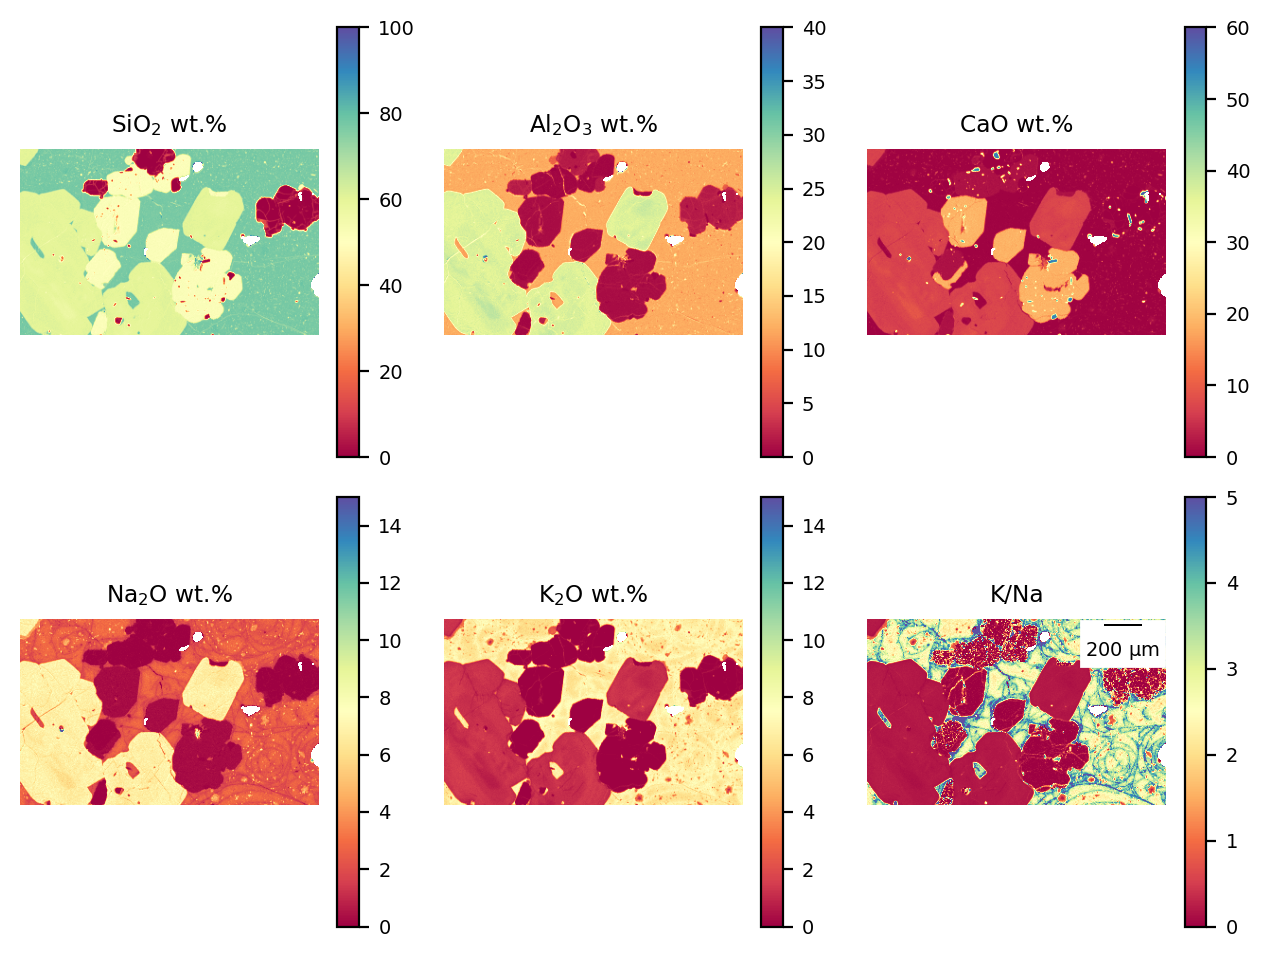

In [ ]:
#setting up plotting scheme for SiO2, Al2O3, CaO, Na2O, K2O, K/Na
cm       = 1/2.54
plt.figure(figsize = (6.5*cm,6.5*cm))
fig, axs = plt.subplots(2, 3)
a0       = axs[0,0].imshow(SiO2,cmap='Spectral',vmin=0, vmax=100)
axs[0,0].set_title("SiO$_{2}$ wt.%")
axs[0,0].axis("off")
fig.colorbar(a0)
a1       = axs[0,1].imshow(Al2O3,cmap='Spectral',vmin=0, vmax=40)
axs[0,1].set_title("Al$_{2}$O$_{3}$ wt.%")
axs[0,1].axis("off")
fig.colorbar(a1)
a2       = axs[0,2].imshow(CaO,cmap='Spectral',vmin=0, vmax=60)
axs[0,2].set_title("CaO wt.%")
axs[0,2].axis("off")
fig.colorbar(a2)
a3       = axs[1,0].imshow(Na2O,cmap='Spectral',vmin=0, vmax=15)
axs[1,0].set_title("Na$_{2}$O wt.%")
axs[1,0].axis("off")
fig.colorbar(a3)
a4       = axs[1,1].imshow(K2O,cmap='Spectral',vmin=0, vmax=15)
axs[1,1].set_title("K$_{2}$O wt.%")
axs[1,1].axis("off")
fig.colorbar(a4)
a5       = axs[1,2].imshow(K_Na,cmap='Spectral',vmin=0, vmax=5)
axs[1,2].set_title("K/Na")
axs[1,2].axis("off")
fig.colorbar(a5)
scalebar = ScaleBar(0.000005) # 1 pixel = 5 µm
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('09028A_M1a.pdf',dpi=600, transparent=True, bbox_inches='tight')

<Figure size 511.811x511.811 with 0 Axes>

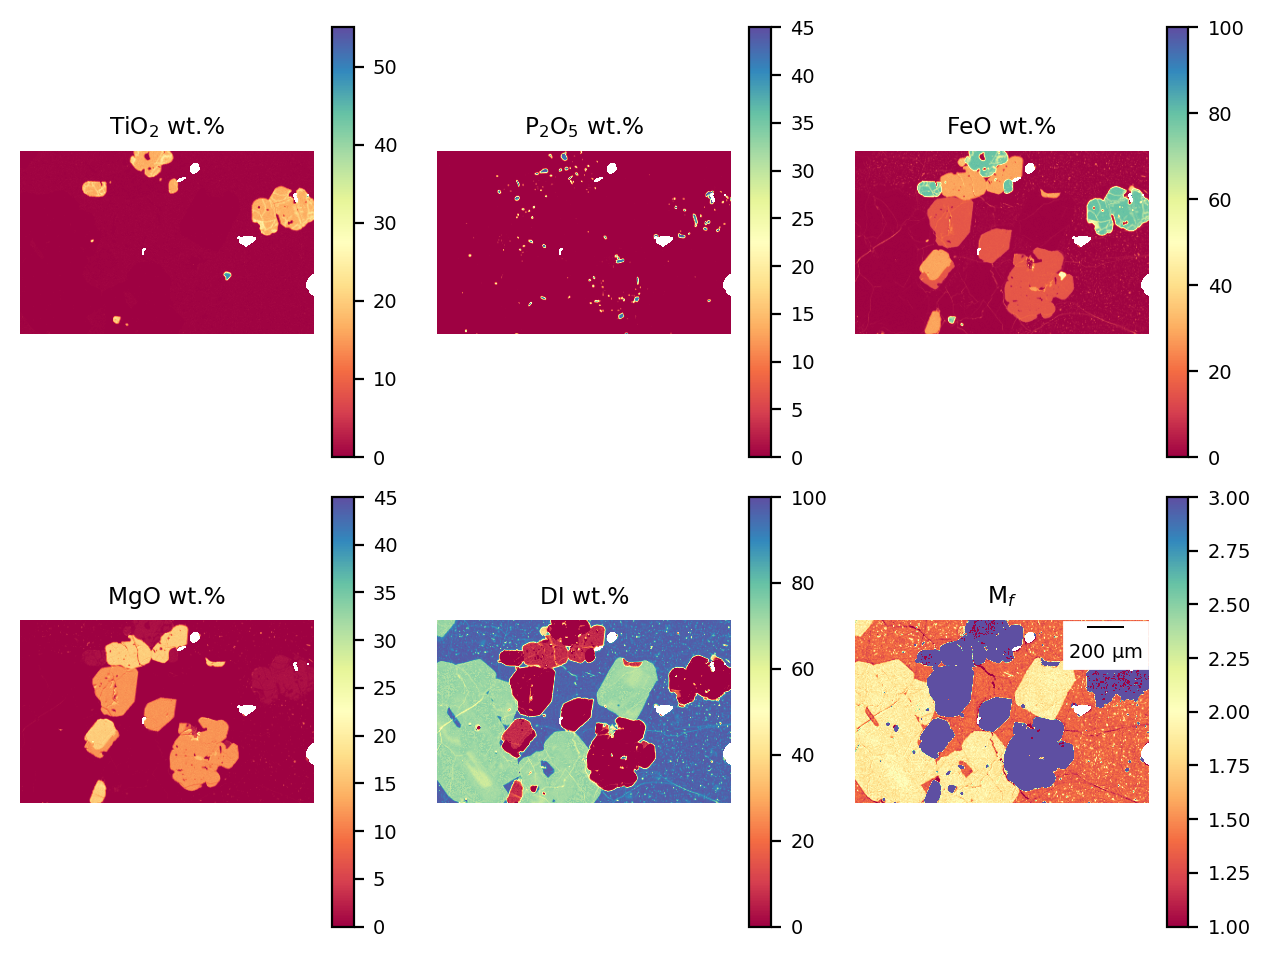

In [ ]:
#setting up plotting scheme for TiO2, P2O5, FeO, MgO, differentiation index, M-factor
plt.figure(figsize=(6.5*cm,6.5*cm))
fig, axs = plt.subplots(2, 3)
a0       = axs[0,0].imshow(TiO2,cmap='Spectral',vmin=0, vmax=55)
axs[0,0].set_title("TiO$_{2}$ wt.%")
axs[0,0].axis("off")
fig.colorbar(a0)
a1       = axs[0,1].imshow(P2O5,cmap='Spectral',vmin=0, vmax=45)
axs[0,1].set_title("P$_{2}$O$_{5}$ wt.%")
axs[0,1].axis("off")
fig.colorbar(a1)
a2       = axs[0,2].imshow(FeO,cmap='Spectral',vmin=0, vmax=100)
axs[0,2].set_title("FeO wt.%")
axs[0,2].axis("off")
fig.colorbar(a2)
a3       = axs[1,0].imshow(MgO,cmap='Spectral',vmin=0, vmax=45)
axs[1,0].set_title("MgO wt.%")
axs[1,0].axis("off")
fig.colorbar(a3)
a4       = axs[1,1].imshow(DI,cmap='Spectral',vmin=0, vmax=100)
axs[1,1].set_title("DI wt.%")
axs[1,1].axis("off")
fig.colorbar(a4)
a5       = axs[1,2].imshow(Mf,cmap='Spectral',vmin=1, vmax=3)
axs[1,2].set_title("M$_{f}$")
axs[1,2].axis("off")
fig.colorbar(a5)
scalebar = ScaleBar(0.000005) # 1 pixel = 5 µm
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('09028A_M1c.pdf',dpi=600, transparent=True, bbox_inches='tight')

<Figure size 511.811x511.811 with 0 Axes>

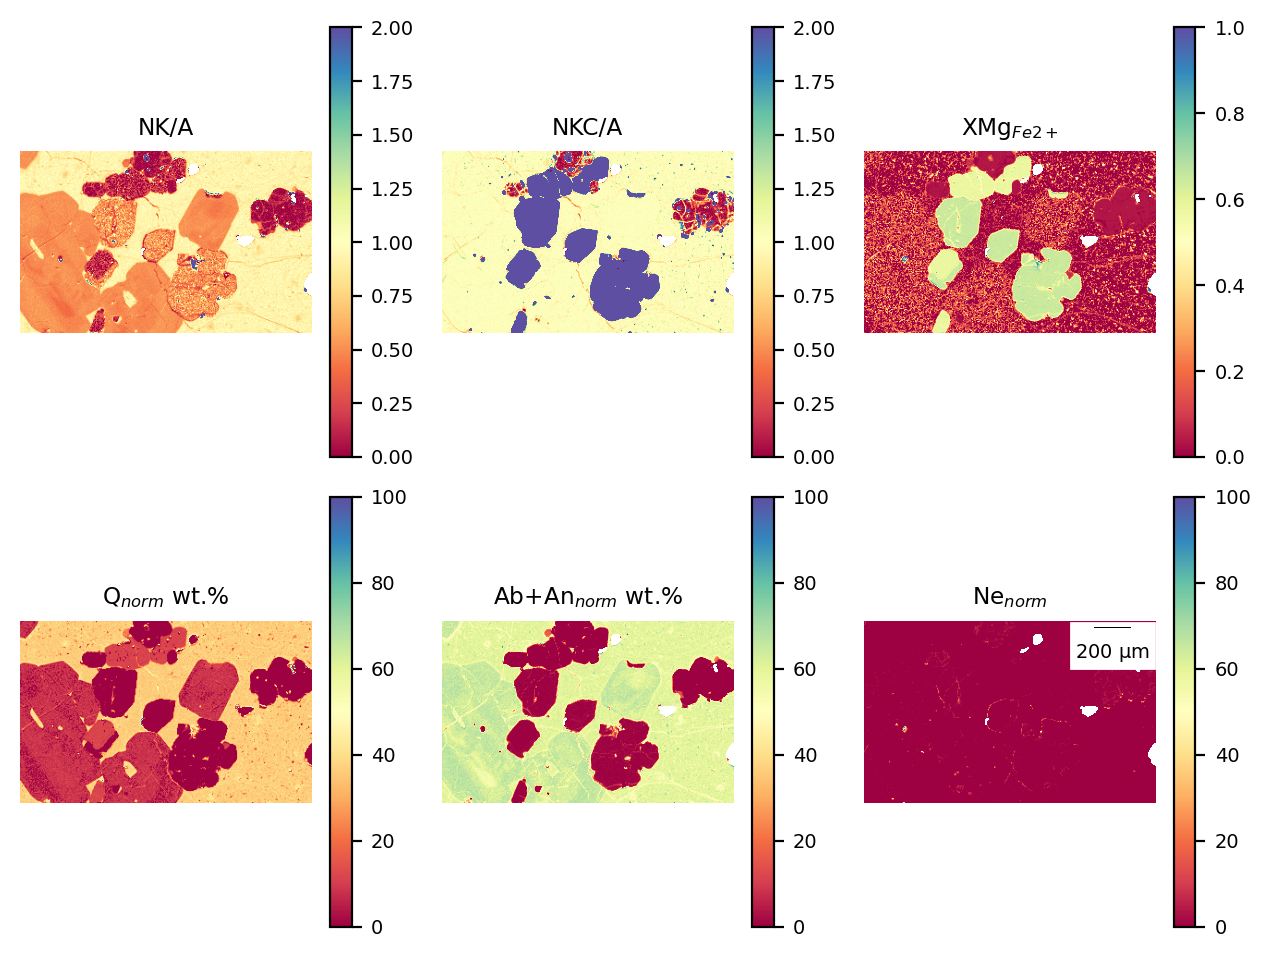

In [ ]:
#setting up plotting scheme for NK/A, NKC/A, XMg, normative Q, normative ab+or, normative Ne
cm       = 1/2.54
plt.figure(figsize=(6.5*cm,6.5*cm))
fig, axs = plt.subplots(2, 3)
a0       = axs[0,0].imshow(NK_A,cmap='Spectral',vmin=0, vmax=2)
axs[0,0].set_title("NK/A")
axs[0,0].axis("off")
fig.colorbar(a0)
a1       = axs[0,1].imshow(NKC_A,cmap='Spectral',vmin=0, vmax=2)
axs[0,1].set_title("NKC/A")
axs[0,1].axis("off")
fig.colorbar(a1)
a2       = axs[0,2].imshow(Mg_MgFe2,cmap='Spectral',vmin=0, vmax=1)
axs[0,2].set_title("XMg$_{Fe2+}$")
axs[0,2].axis("off")
fig.colorbar(a2)
a3       = axs[1,0].imshow(Q,cmap='Spectral',vmin=0, vmax=100)
axs[1,0].set_title("Q$_{norm}$ wt.%")
axs[1,0].axis("off")
fig.colorbar(a3)
a4       = axs[1,1].imshow(Fsp,cmap='Spectral',vmin=0, vmax=100)
axs[1,1].set_title("Ab+An$_{norm}$ wt.%")
axs[1,1].axis("off")
fig.colorbar(a4)
a5       = axs[1,2].imshow(Ne,cmap='Spectral',vmin=0, vmax=100)
axs[1,2].set_title("Ne$_{norm}$")
axs[1,2].axis("off")
fig.colorbar(a5)
scalebar = ScaleBar(0.000005) # 1 pixel = 5 µm
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('09028A_M1b.pdf',dpi=600, transparent=True, bbox_inches='tight')

In [ ]:
#Reshaping matrix into 1D-arrays and deleting nan values
K_Na_new = K_Na.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
Mf_new = Mf.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
SiO2_new = SiO2.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
FeO_new = FeO.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
CaO_new = CaO.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
P2O5_new = P2O5.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
Nx_new = Nx.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
Ny_new = Ny.reshape([1, c*d])[~np.isnan(K_Na.reshape([1, c*d]))]
#Filtering K_Na data to only consider rhyolitic glass
#sbn.kdeplot(K_Na_new,bw_adjust=.4)
K_Na_new2=K_Na_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
Mf_new2=Mf_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
SiO2_new2=SiO2_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
FeO_new2=FeO_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
CaO_new2=CaO_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
P2O5_new2=P2O5_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
Nx_new2=Nx_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]
Ny_new2=Ny_new[(SiO2_new > 72) & (SiO2_new < 84) & (FeO_new < 2.5) & (CaO_new < 4) &
                   (K_Na_new < 6) & (K_Na_new > 0) & (P2O5_new < 1) & (P2O5_new > 0)]

<Figure size 511.811x511.811 with 0 Axes>

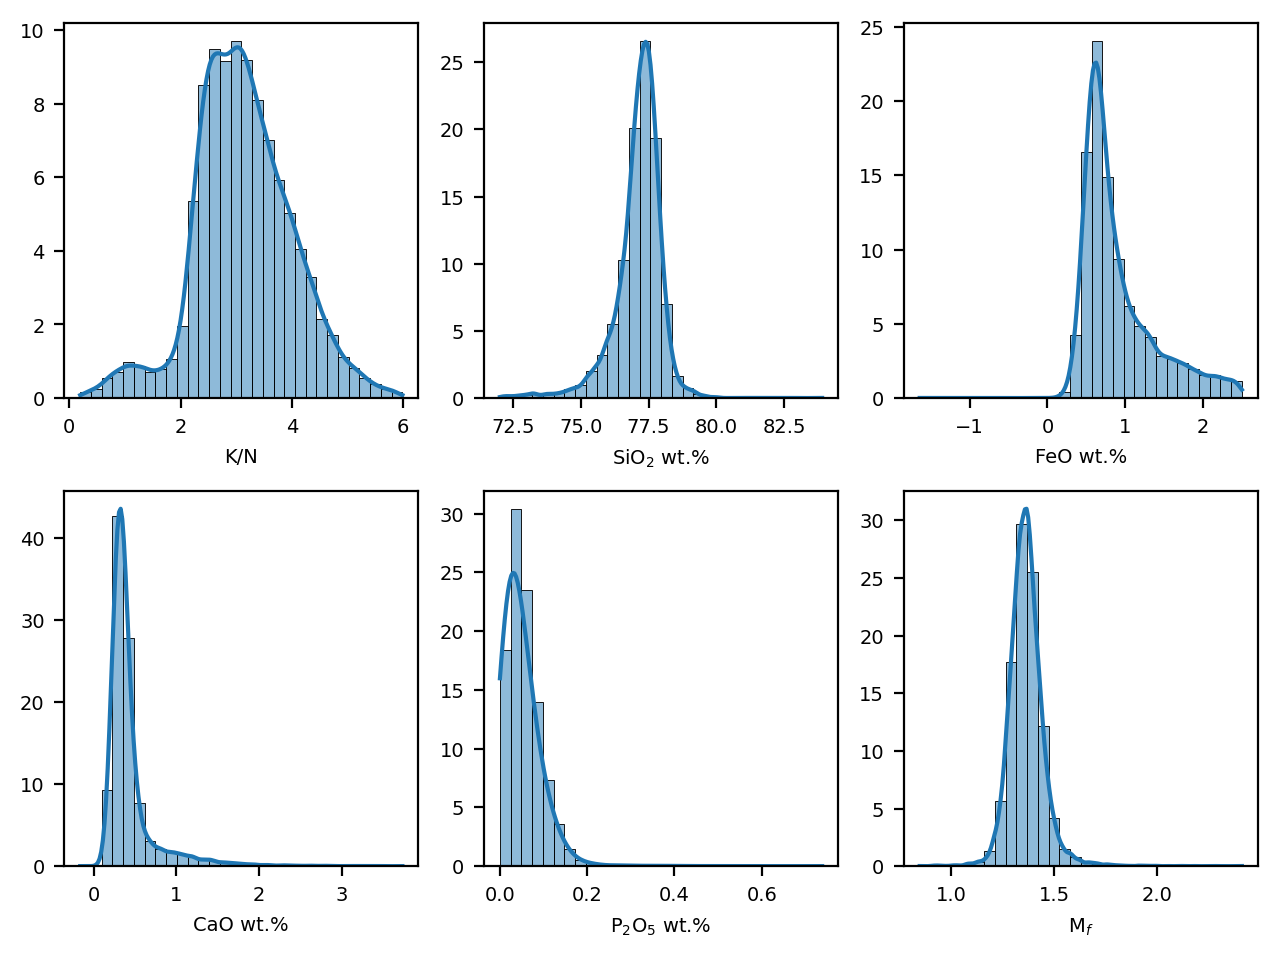

In [ ]:
#setting up plotting scheme for NK/A, NKC/A, XMg, normative Q, normative ab+or, normative Ne
cm       = 1/2.54
plt.figure(figsize=(6.5*cm,6.5*cm))
fig, axs = plt.subplots(2, 3)
sbn.histplot(K_Na_new2,stat='percent', kde=True, bins=30,ax=axs[0,0])
axs[0,0].set_xlabel("K/N")
axs[0,0].set_ylabel(None)
sbn.histplot(SiO2_new2,stat='percent', kde=True,bins=30, ax=axs[0,1])
axs[0,1].set_xlabel("SiO$_{2}$ wt.%")
axs[0,1].set_ylabel(None)
sbn.histplot(FeO_new2,stat='percent', kde=True, bins=30,ax=axs[0,2])
axs[0,2].set_xlabel("FeO wt.%")
axs[0,2].set_ylabel(None)
sbn.histplot(CaO_new2,stat='percent', kde=True,bins=30, ax=axs[1,0])
axs[1,0].set_xlabel("CaO wt.%")
axs[1,0].set_ylabel(None)
sbn.histplot(P2O5_new2,stat='percent', kde=True, kde_kws={'bw_adjust':3},bins=30, ax=axs[1,1])
axs[1,1].set_xlabel("P$_{2}$O$_{5}$ wt.%")
axs[1,1].set_ylabel(None)
sbn.histplot(Mf_new2,stat='percent', kde=True,bins=30, ax=axs[1,2])
axs[1,2].set_xlabel("M$_{f}$")
axs[1,2].set_ylabel(None)
plt.tight_layout()
plt.savefig('09028A_M1kn.pdf',dpi=600, transparent=True, bbox_inches='tight')

<Figure size 511.811x511.811 with 0 Axes>

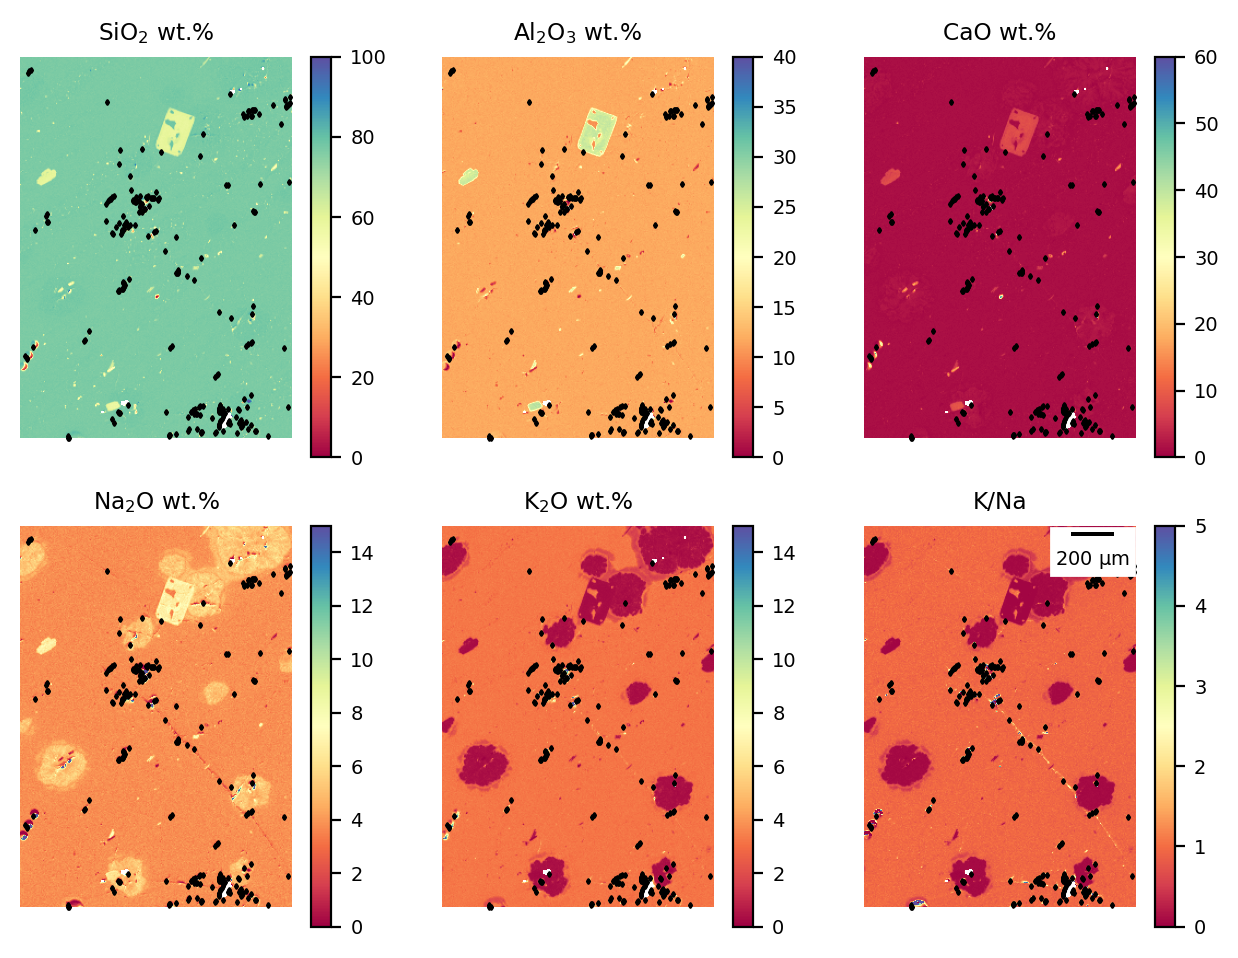

In [ ]:
Nx_new3=Nx_new2[(Mf_new2 < 1.2)&(K_Na_new2 < 2.5)&(K_Na_new2 > 0.5)]
Ny_new3=Ny_new2[(Mf_new2 < 1.2)&(K_Na_new2 < 2.5)&(K_Na_new2 > 0.5)]
#setting up plotting scheme for SiO2, Al2O3, CaO, Na2O, K2O, K/Na
cm       = 1/2.54
plt.figure(figsize = (6.5*cm,6.5*cm))
fig, axs = plt.subplots(2, 3)
a0       = axs[0,0].imshow(SiO2,cmap='Spectral',vmin=0, vmax=100)
axs[0,0].scatter(Nx_new3,Ny_new3,c='k',marker='d',s=1)
axs[0,0].set_title("SiO$_{2}$ wt.%")
axs[0,0].axis("off")
fig.colorbar(a0)
a1       = axs[0,1].imshow(Al2O3,cmap='Spectral',vmin=0, vmax=40)
axs[0,1].scatter(Nx_new3,Ny_new3,c='k',marker='d',s=1)
axs[0,1].set_title("Al$_{2}$O$_{3}$ wt.%")
axs[0,1].axis("off")
fig.colorbar(a1)
a2       = axs[0,2].imshow(CaO,cmap='Spectral',vmin=0, vmax=60)
axs[0,2].scatter(Nx_new3,Ny_new3,c='k',marker='d',s=1)
axs[0,2].set_title("CaO wt.%")
axs[0,2].axis("off")
fig.colorbar(a2)
a3       = axs[1,0].imshow(Na2O,cmap='Spectral',vmin=0, vmax=15)
axs[1,0].scatter(Nx_new3,Ny_new3,c='k',marker='d',s=1)
axs[1,0].set_title("Na$_{2}$O wt.%")
axs[1,0].axis("off")
fig.colorbar(a3)
a4       = axs[1,1].imshow(K2O,cmap='Spectral',vmin=0, vmax=15)
axs[1,1].scatter(Nx_new3,Ny_new3,c='k',marker='d',s=1)
axs[1,1].set_title("K$_{2}$O wt.%")
axs[1,1].axis("off")
fig.colorbar(a4)
a5       = axs[1,2].imshow(K_Na,cmap='Spectral',vmin=0, vmax=5)
axs[1,2].scatter(Nx_new3,Ny_new3,c='k',marker='d',s=1)
axs[1,2].set_title("K/Na")
axs[1,2].axis("off")
fig.colorbar(a5)
scalebar = ScaleBar(0.000005) # 1 pixel = 5 µm
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('Krafla1Mf.pdf',dpi=600, transparent=True, bbox_inches='tight')